In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def dfdy(Xi, F = 8):
    return np.roll(Xi, 1, axis = 1)*(np.roll(Xi, -1, axis = 1)-np.roll(Xi, 2, axis = 1)) - Xi + F

In [91]:
# Parameter
N = 100
F = 8
NT = int(1e4)+1
dt = 1e-2
member = 1
# Initial condition
np.random.seed(12229008)
x_init = np.random.normal(loc = 0, scale = 1e-1, size = (N,))
# Total member/time data
x = np.tile(np.zeros_like(x_init), (member, NT, 1))

x[:,0,:] = x_init + np.random.normal(loc = 0, scale = 1e-2, size = (member, N))
for time in range(1,NT):
    x[:,time,:] = x[:,time-1,:] + dfdy(x[:,time-1,:], F)*dt

In [92]:
error = np.var(x - np.mean(x, axis = 0), axis = 0)
print(error.shape)

(10001, 100)


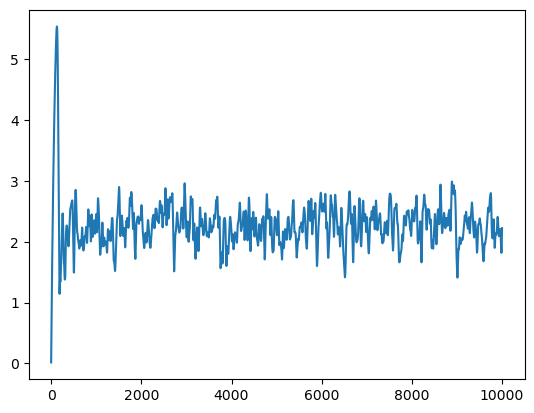

In [93]:
plt.plot(np.mean(x[-1,:,:], axis = 1))

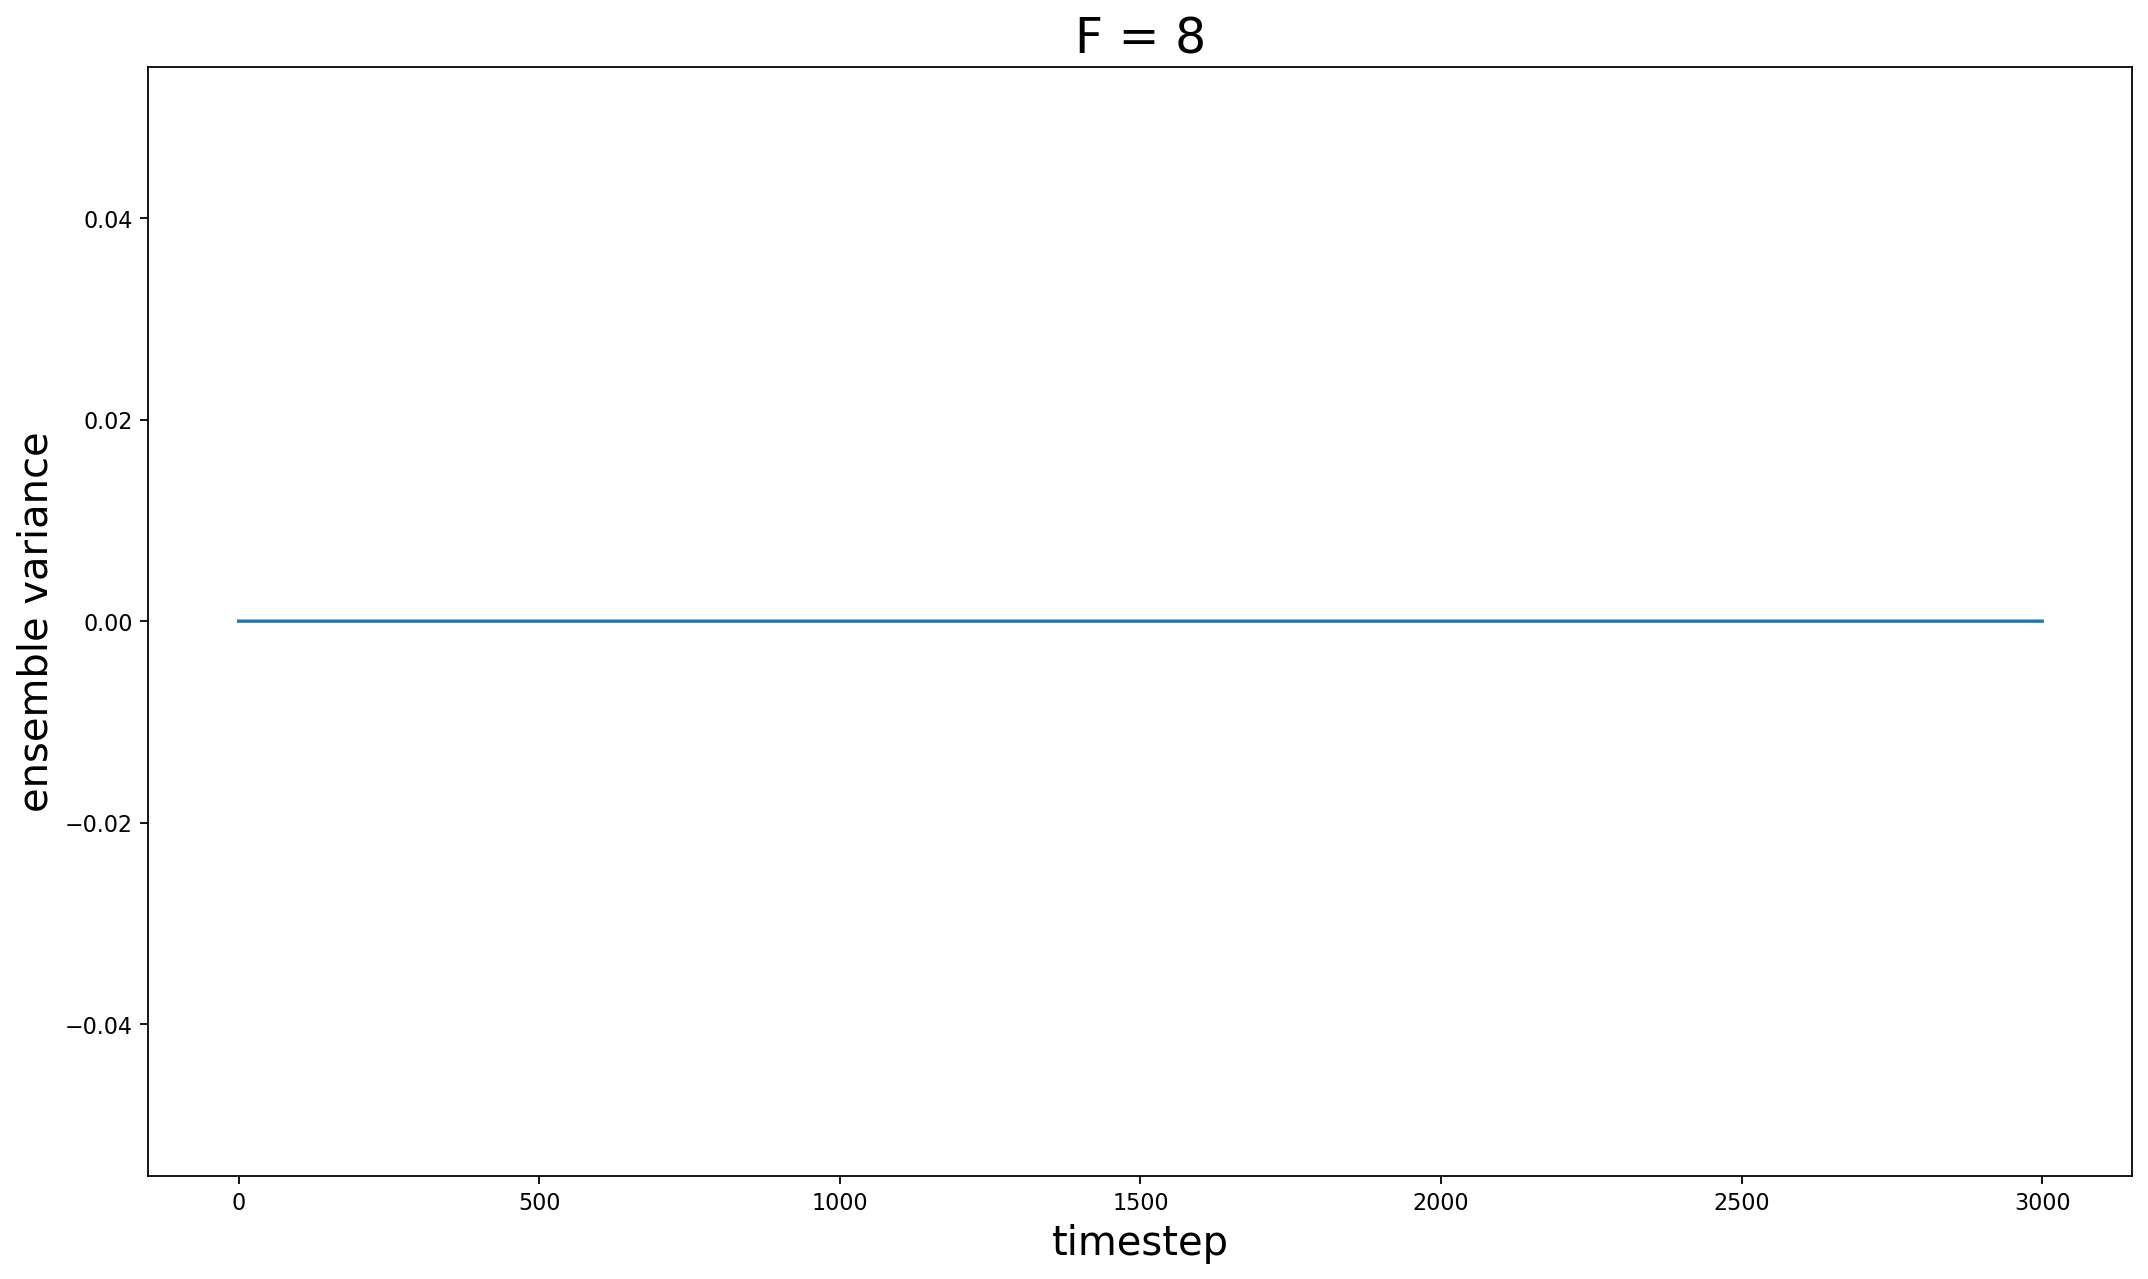

In [85]:
plt.figure(figsize = (16, 9), dpi = 160)
plt.plot(np.mean(error[:,:], axis = 1))
plt.xlabel("timestep", fontsize = 18)
plt.ylabel("ensemble variance", fontsize = 18)
plt.title("F = 8", fontsize = 22)
plt.savefig("TEST.png")

In [23]:
ring = np.linspace(0, 2*np.pi, N)
print(ring.shape)

(100,)


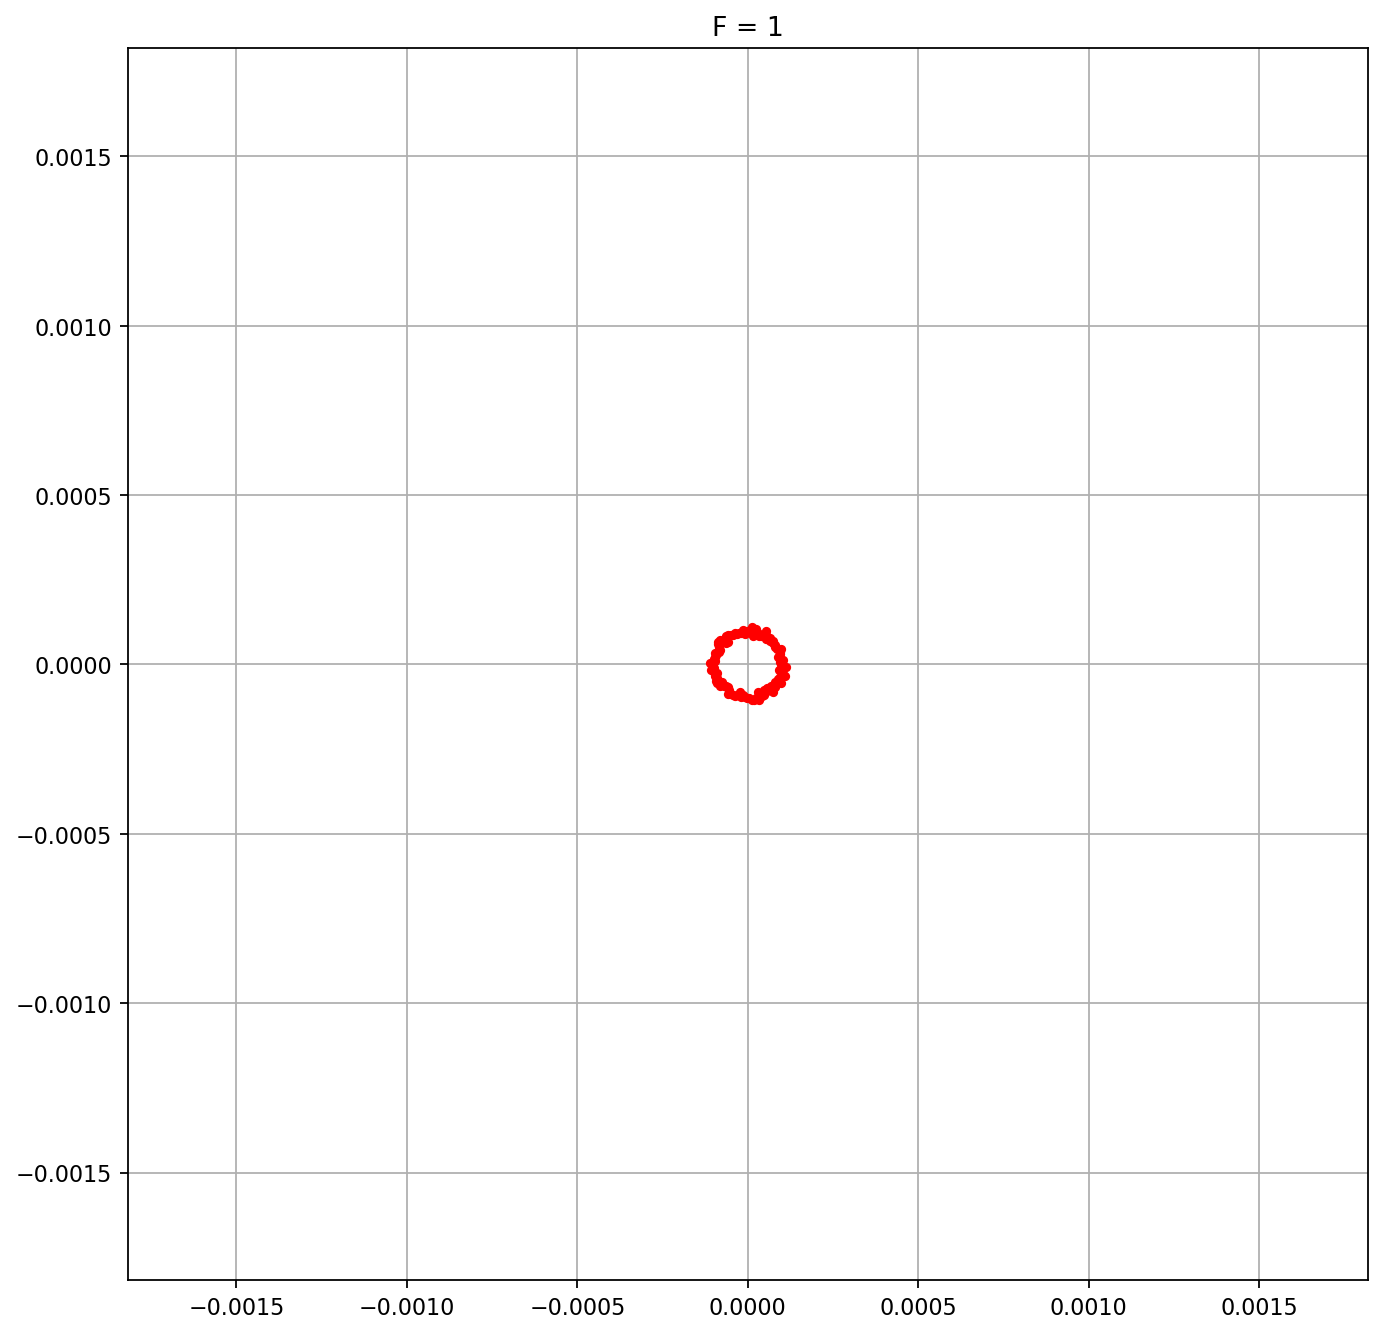

In [26]:
# Plot initialize
fig, ax = plt.subplots(figsize = (10, 10), dpi = 160)
plot, = ax.plot([], [], 'r-', zorder = 1)
mean, = ax.plot([], [], 'k--', zorder = -1)
scatter = ax.scatter([],[], s = 10, c = 'r', zorder = 3)
temp = np.max(np.abs(error[time, :]))
ax.set_xlim(-temp, temp)
ax.set_ylim(-temp, temp)
ax.grid()
ax.set_title(f"F = {F}")
# Update
def update(time):
    plot.set_data(error[time, :]*np.cos(ring), error[time, :]*np.sin(ring))
    mean.set_data(np.mean(error[time, :])*np.cos(ring), np.mean(error[time, :])*np.sin(ring))
    data = error[time, :].reshape(-1, 1)* np.hstack((np.cos(ring).reshape(-1, 1), np.sin(ring).reshape(-1, 1)))
    scatter.set_offsets(data)
    return plot,
anim = animation.FuncAnimation(fig = fig, 
                               func = update,
                               frames = NT,
                               interval = 20,
                               blit = False)
anim.save("HW3.mp4")

In [ ]:
for i in range(20):
    plt.scatter(error[i, :]*np.cos(ring), error[i, :]*np.sin(ring))